# NOTEBOOK TO TRAIN AND SAVE A MODEL

In [2]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
import pickle

# splitting
from sklearn.model_selection import train_test_split

# models
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [31]:
# loading the data

# features to be used (selected from the notebook Pre-Processing)
X = pd.read_csv('features.csv')

# targets to be used (selected from the notebook Pre-Processing)
y_AR = pd.read_csv('targets_AR.csv')
y_YI = pd.read_csv('targets_YI.csv')

In [32]:
# Summing soluble and insoluble ligning (so to get total ligning in raw material)
X['Total lignin (wt.%)'] = X['Insoluble lignin (wt.%)'] + X['Soluble lignin (wt.%)']
X = X[['Cationic demand (µeq/g)','Transmittance at 600 nm (%)','HPH - Energy consumption (kWh/kg)','Consistency index "k"','Flow index "n"','Cellulose (wt.%)','Hemicellulose (wt.%)','Total lignin (wt.%)','Extractives (wt.%)','Ashes (wt.%)','CrI (%)']]
display(X)

,Cationic demand (µeq/g),Transmittance at 600 nm (%),HPH - Energy consumption (kWh/kg),"Consistency index ""k""","Flow index ""n""",Cellulose (wt.%),Hemicellulose (wt.%),Total lignin (wt.%),Extractives (wt.%),Ashes (wt.%),CrI (%)
0,199,0.097,14.59,0.7810,0.299,0.462,0.229,0.294,0.009,0.005,0.761
1,155,0.031,7.73,0.6245,0.272,0.479,0.229,0.270,0.007,0.014,0.733
2,214,0.119,19.72,1.2010,0.278,0.462,0.229,0.294,0.009,0.005,0.761
3,188,0.099,14.59,6.6384,0.224,0.742,0.166,0.082,0.000,0.008,0.811
4,154,0.054,5.67,2.1776,0.253,0.853,0.087,0.039,0.012,0.009,0.870
5,185,0.070,11.67,0.6160,0.307,0.462,0.229,0.294,0.009,0.005,0.761
6,166,0.065,7.73,4.9868,0.280,0.742,0.166,0.082,0.000,0.008,0.811
7,201,0.095,14.59,4.8156,0.234,0.853,0.087,0.039,0.012,0.009,0.870
8,190,0.074,19.72,1.1071,0.239,0.479,0.229,0.270,0.007,0.014,0.733
9,170,0.059,11.67,0.7885,0.270,0.479,0.229,0.270,0.007,0.014,0.733


In [33]:
def training_RandomForestRegressor(X, y, 
                                               test_size=0.2, 
                                               random_state_split=42, 
                                               n_estimators=200,
                                               min_samples_leaf = 1,
                                               max_depth = None,
                                               random_state_model=1,
                                               top_n_features = 6,
                                               print_out = False
                                              ):
    
    """
    This function will split, train, test and output results for the model
    
    X -> DataFrame of the features
    y -> DataFrame of the targets
    """
    global X_train, X_test, y_train, y_test
    # splitting
    X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(),
                                                        test_size = test_size,
                                                        random_state = random_state_split
                                                       )
    # instanciating the model
    model_RandomForestRegressor = RandomForestRegressor(n_estimators=n_estimators,
                                                        min_samples_leaf=min_samples_leaf,
                                                        random_state = random_state_model
                                                       )
    # training the model
    model_RandomForestRegressor.fit(X_train, y_train)
    
    # predicting the model with train test
    prediction_train = model_RandomForestRegressor.predict(X_train)
    
    # output the results from train set
    MAE = mean_absolute_error(y_train,prediction_train)
    MAPE = mean_absolute_percentage_error(y_train,prediction_train)
    RSME = mean_squared_error(y_train,prediction_train, squared = False)
    R2 = r2_score(y_train,prediction_train)
    

    #Getting features importance from this last model
    feat_importances_model_RF = pd.Series(model_RandomForestRegressor.feature_importances_, index=X.columns)
    
    if print_out == True:
        print("MAE train set:", MAE)
        print("MAPE train set::", MAPE)
        print("RSME train set::", RSME)
        print("R2 score train set::", R2)

        fig, ax = plt.subplots()
        ax.scatter(y_train, prediction_train, edgecolors=(0, 0, 0))
        ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "k--", lw=2)
        ax.set_xlabel("Measured")
        ax.set_ylabel("Predicted")
        plt.show()

        feat_importances_model_RF.nlargest(top_n_features).plot(kind='barh');
       
    
    return [MAE,MAPE,RSME,R2,feat_importances_model_RF, model_RandomForestRegressor]

# Yield

MAE train set: 0.00836579514998317
MAPE train set:: 0.09456315219391676
RSME train set:: 0.011833158879487105
R2 score train set:: 0.9333433630152081


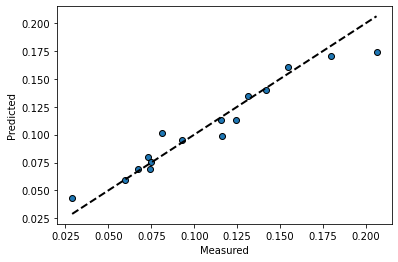

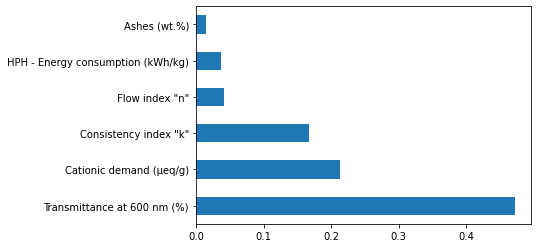

In [34]:
return_list = training_RandomForestRegressor(X, y_YI,
                                               print_out = True
                                              )

MIN_SAMPLES: 1
max: 0.012006605574750001
min: 0.007742124121729002


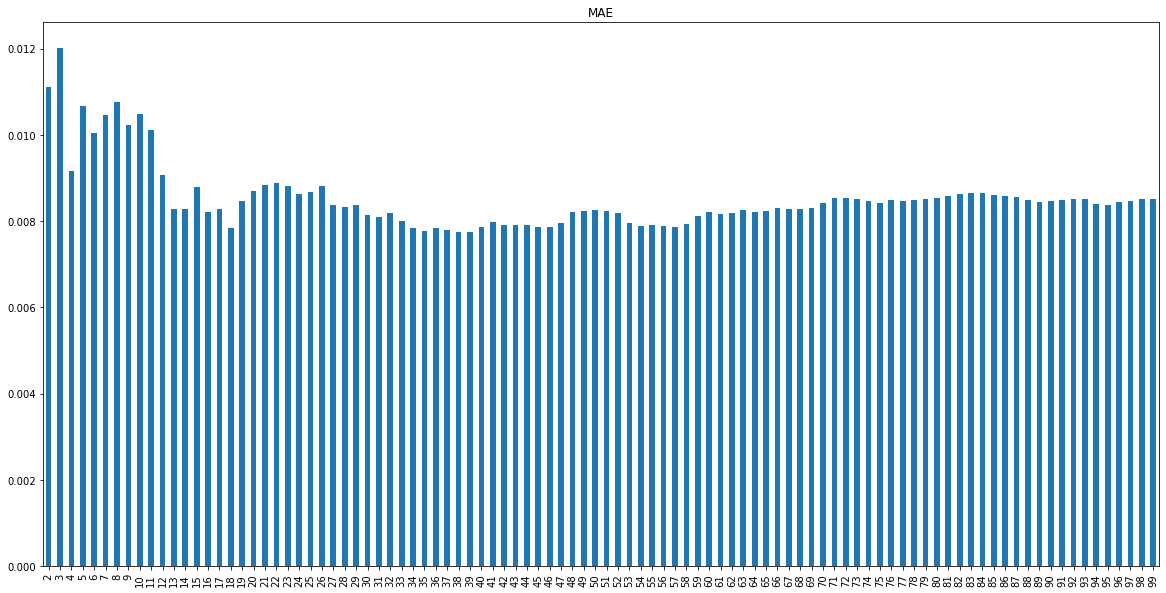

max: 0.12187754014511885
min: 0.07680170496604205


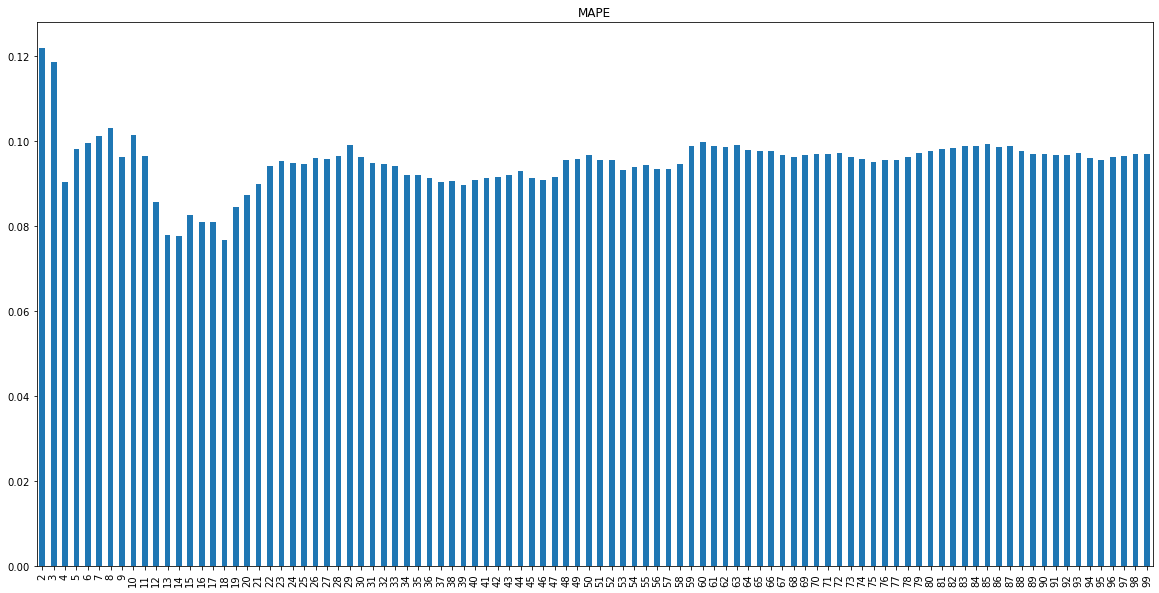

max: 0.016149064826934578
min: 0.011060293570331312


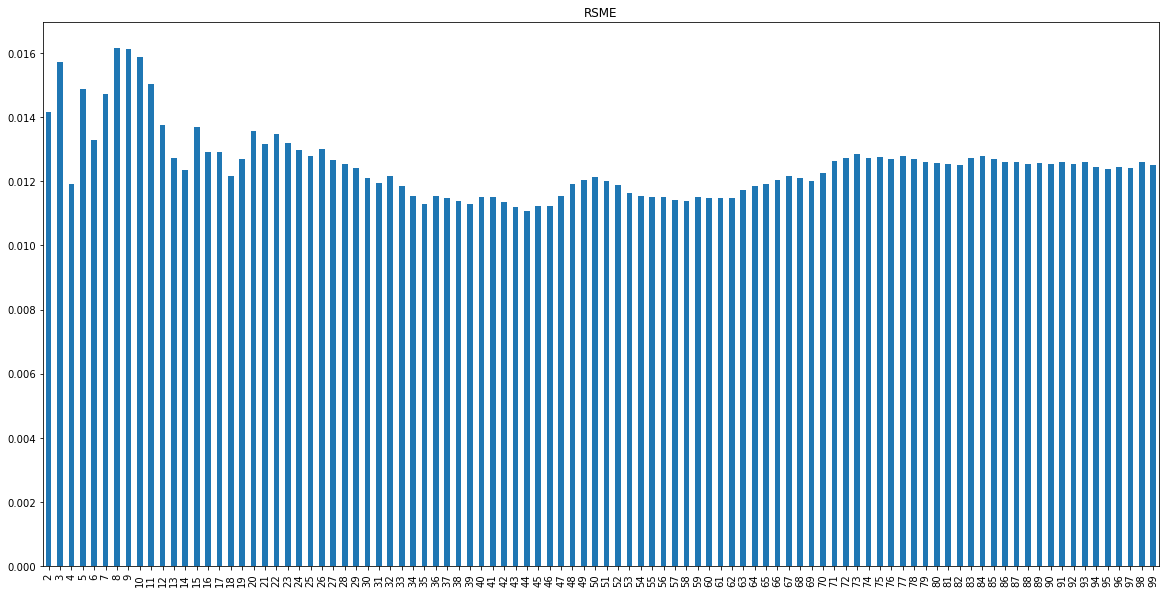

max: 0.9417661751197716
min: 0.8758528474461994


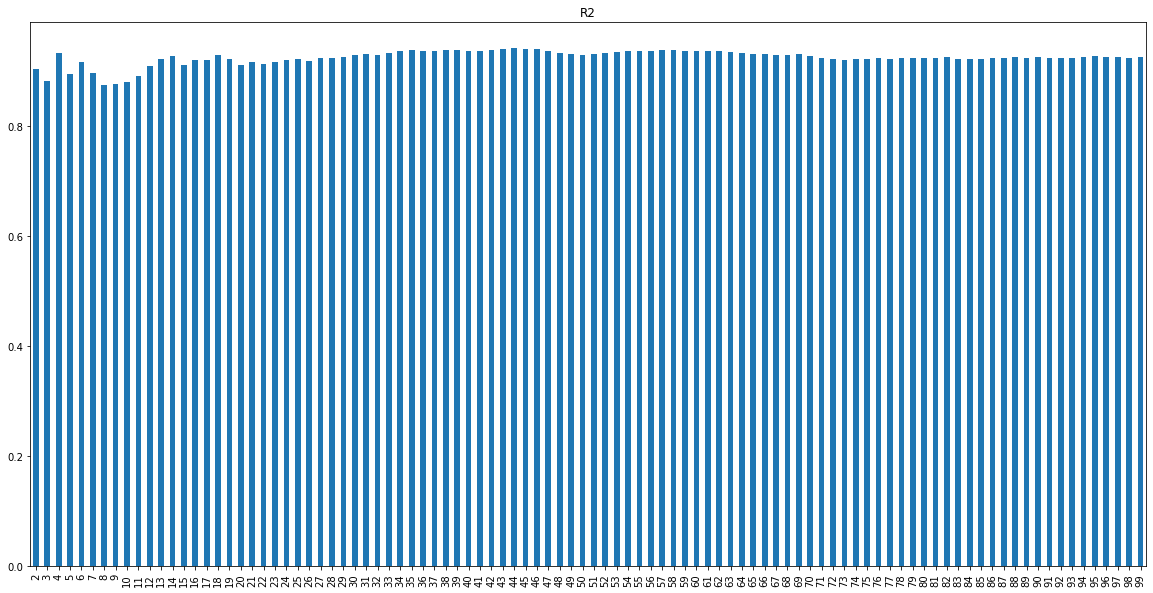

MIN_SAMPLES: 2
max: 0.015332046508966458
min: 0.011602674861287847


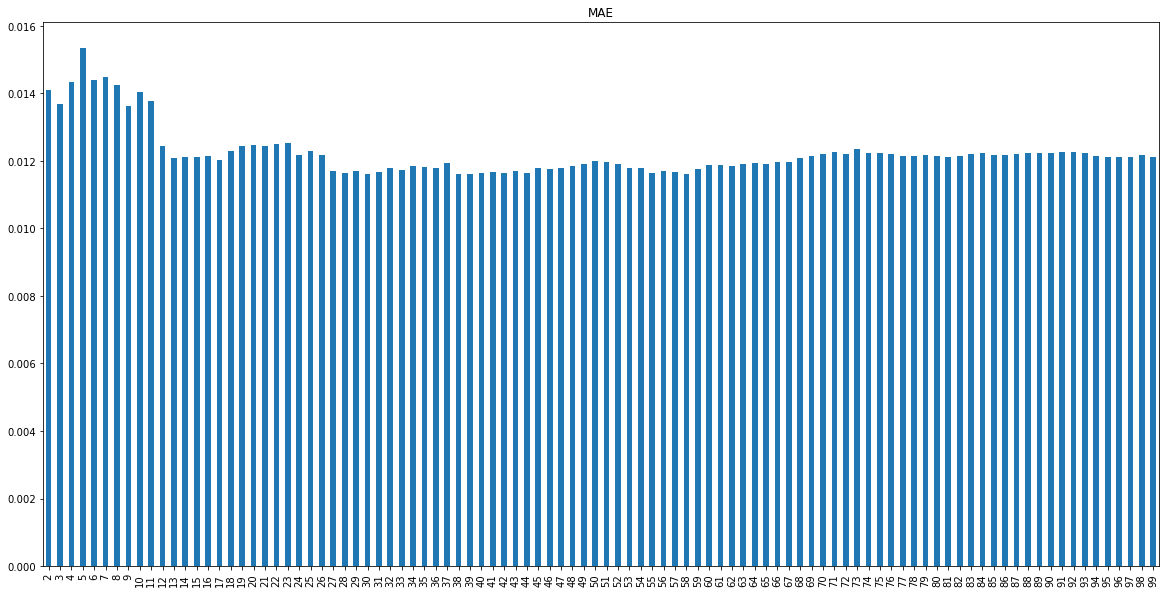

max: 0.1625516397465465
min: 0.13459191632392523


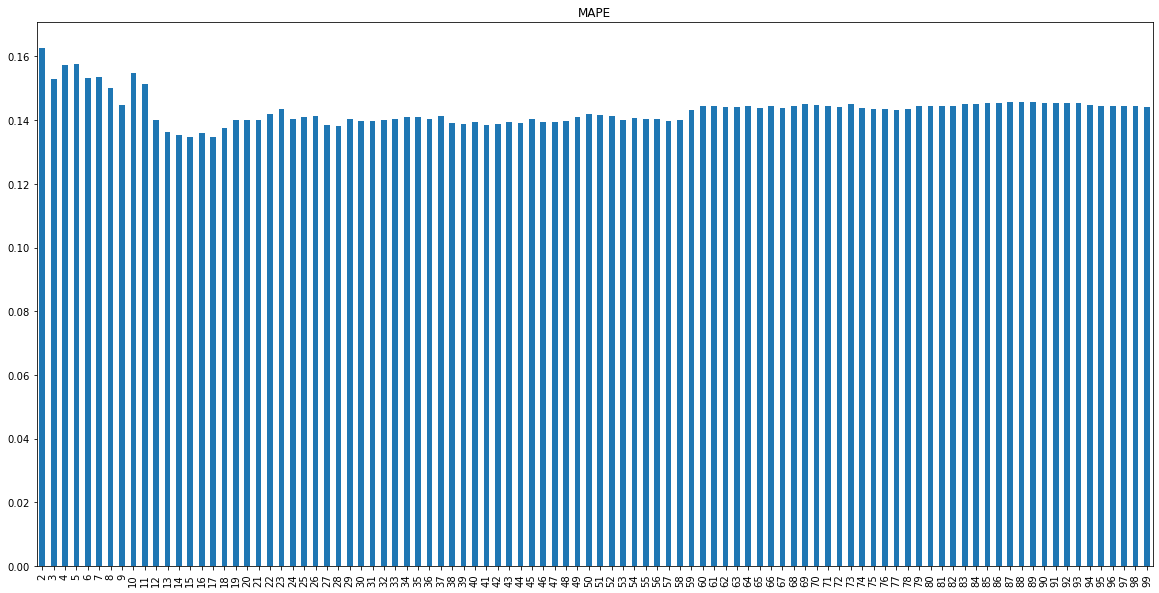

max: 0.02114193873928255
min: 0.016922729663584195


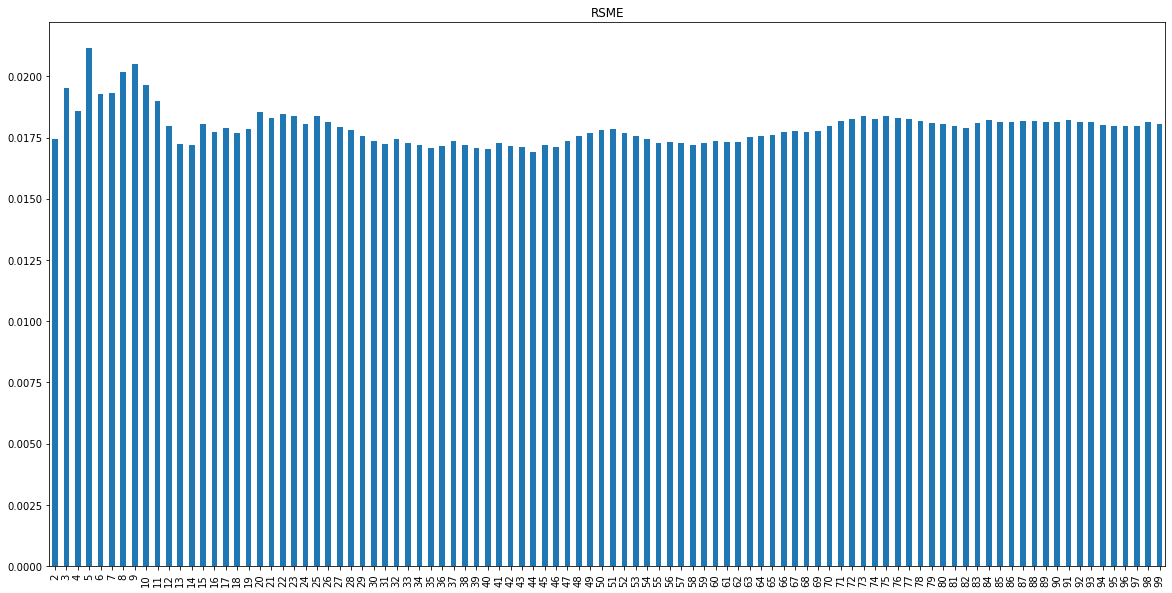

max: 0.8636726977414175
min: 0.7872195968857004


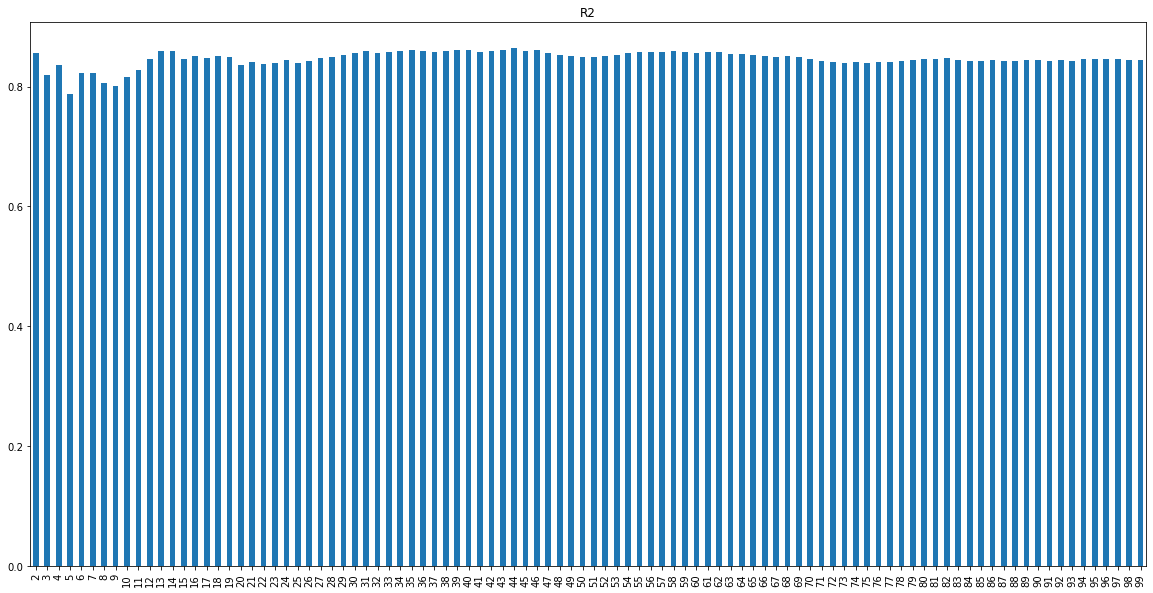

MIN_SAMPLES: 3
max: 0.019546983465812413
min: 0.013942849833850012


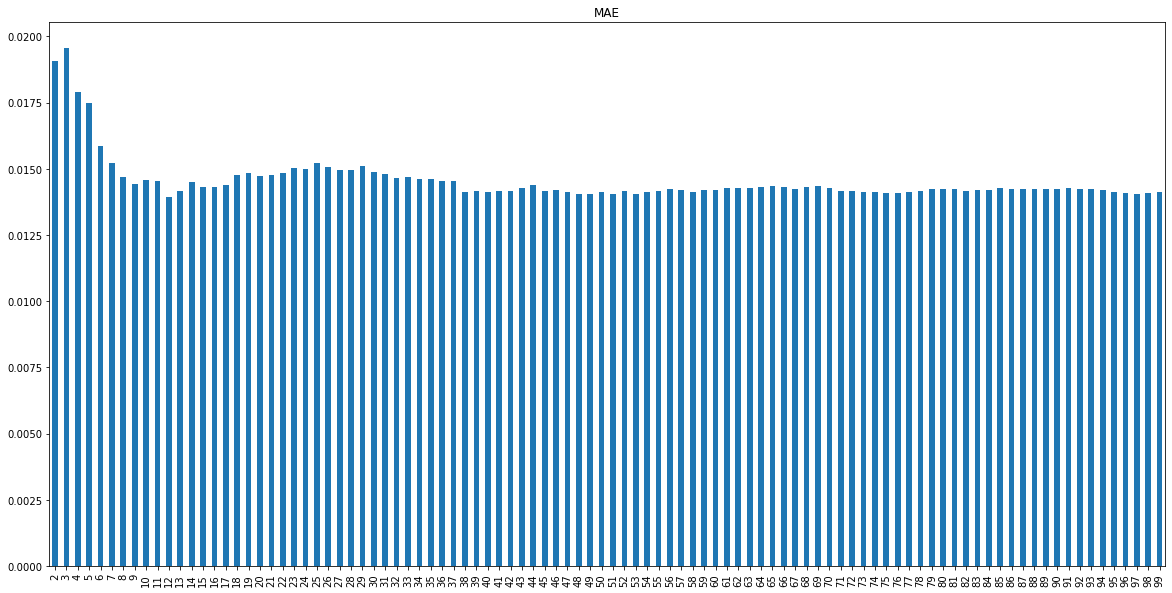

max: 0.22283526903568734
min: 0.16469928093665853


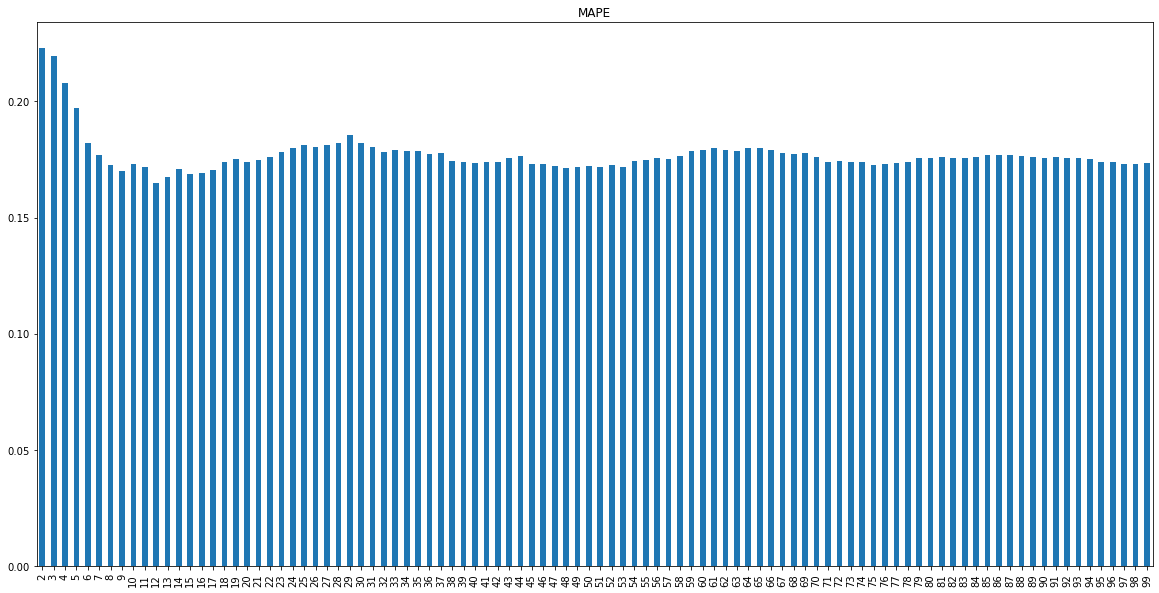

max: 0.025165753192781283
min: 0.019652552903007086


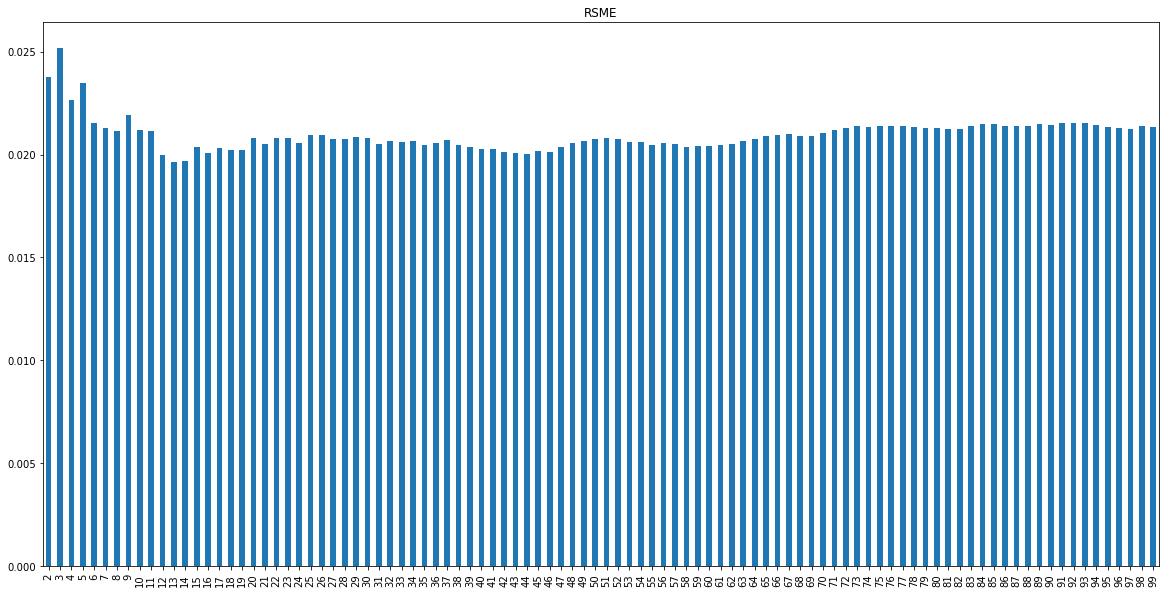

max: 0.8161430906872031
min: 0.6985176629145051


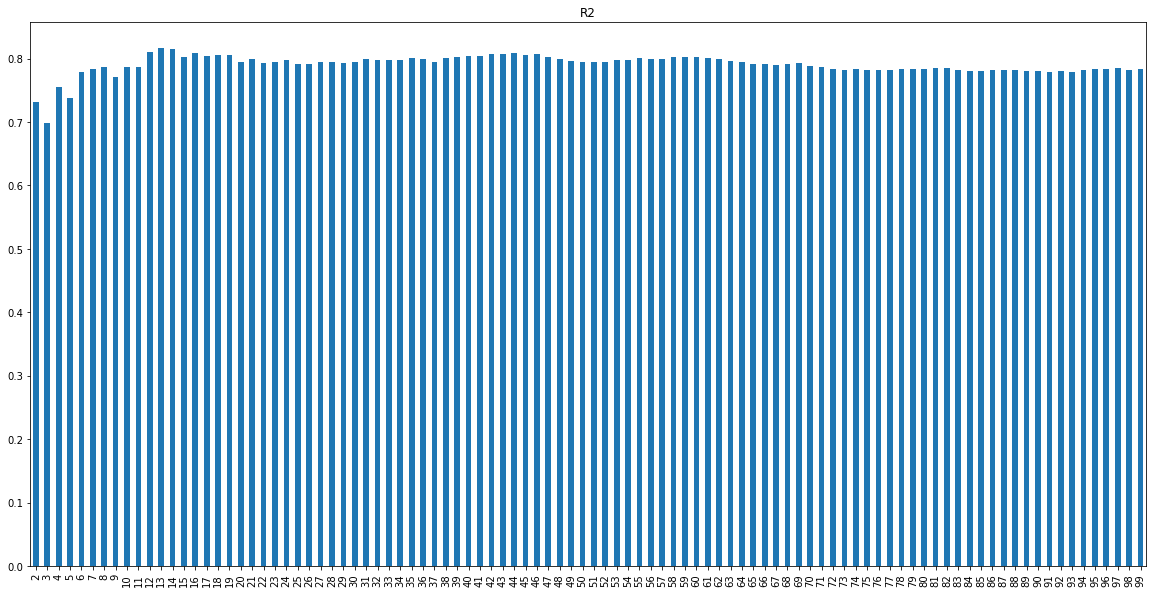

MIN_SAMPLES: 4
max: 0.02406109829684444
min: 0.016577446969338133


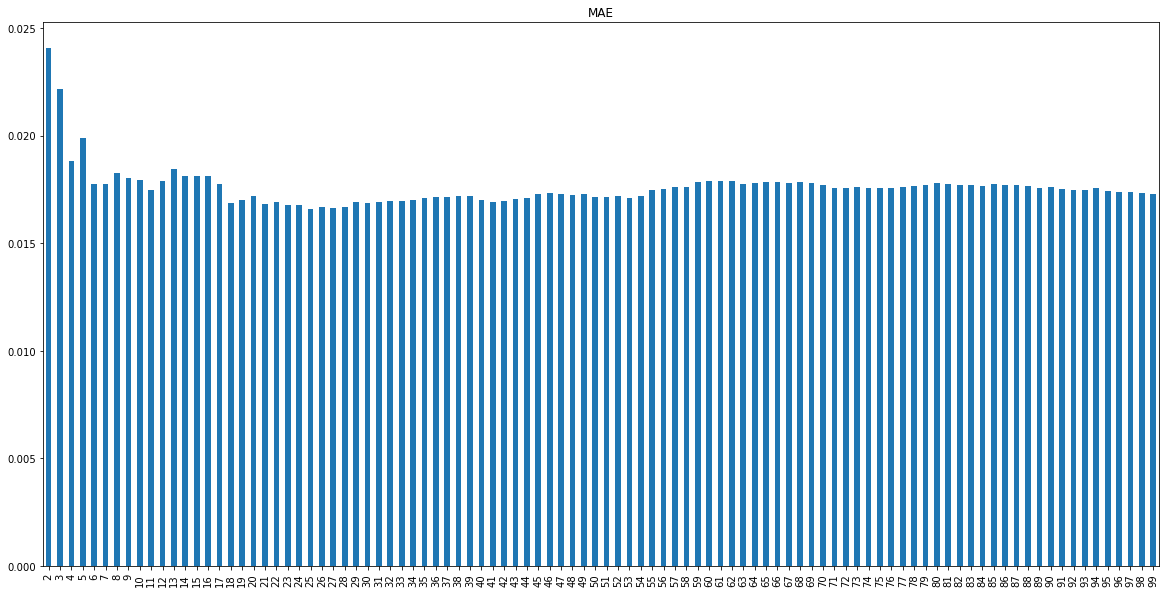

max: 0.2638960231344008
min: 0.1981439642545248


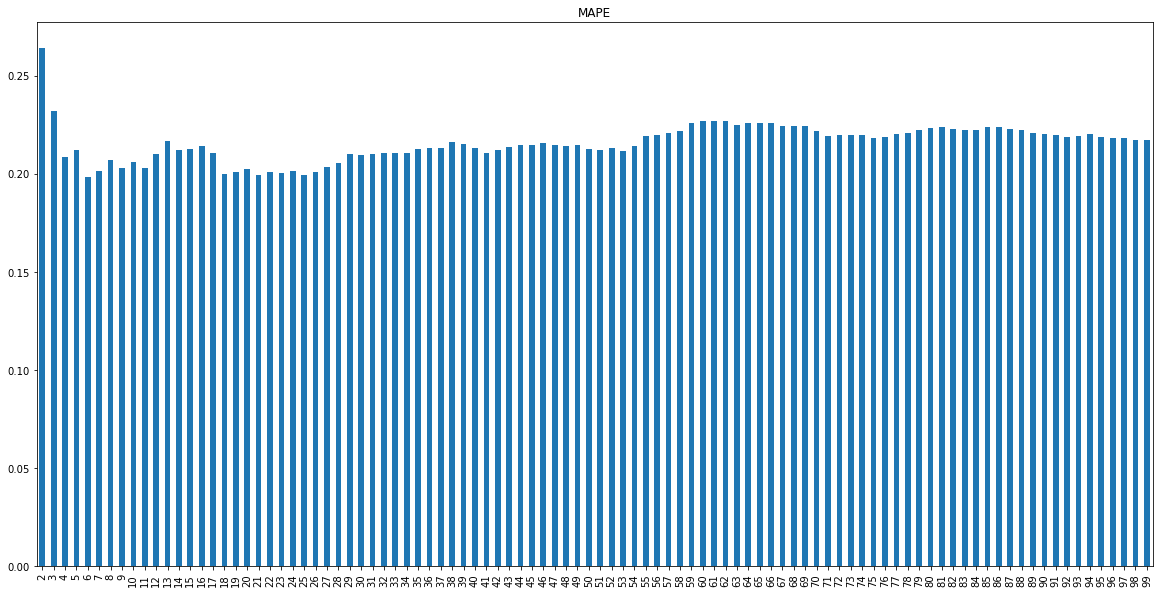

max: 0.03082229187434096
min: 0.025254852016304626


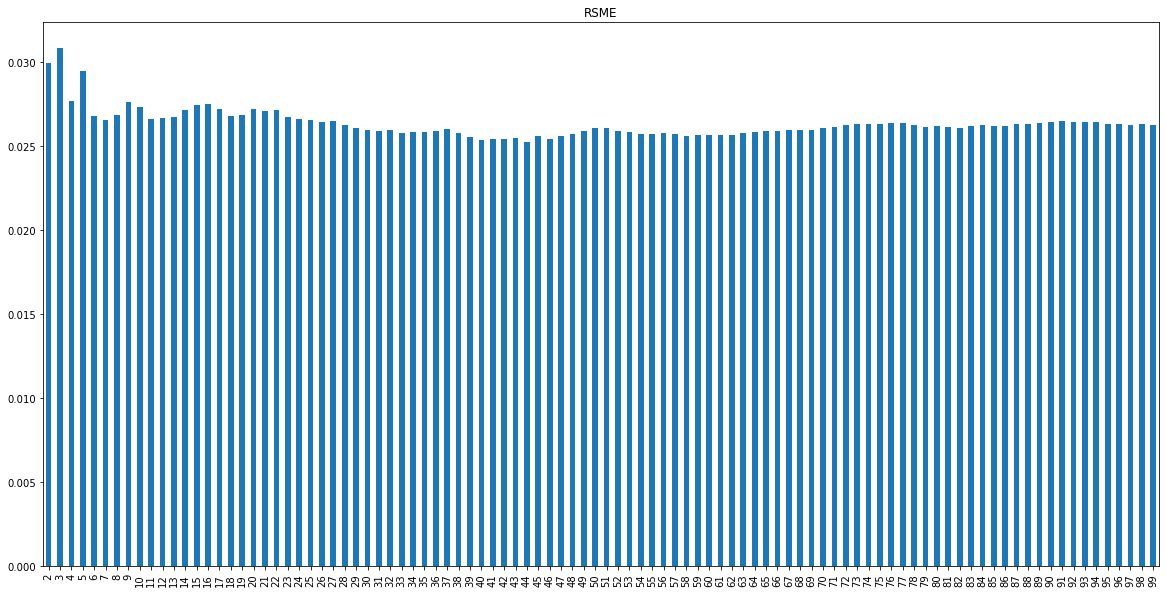

max: 0.6963791000013846
min: 0.5477569883417599


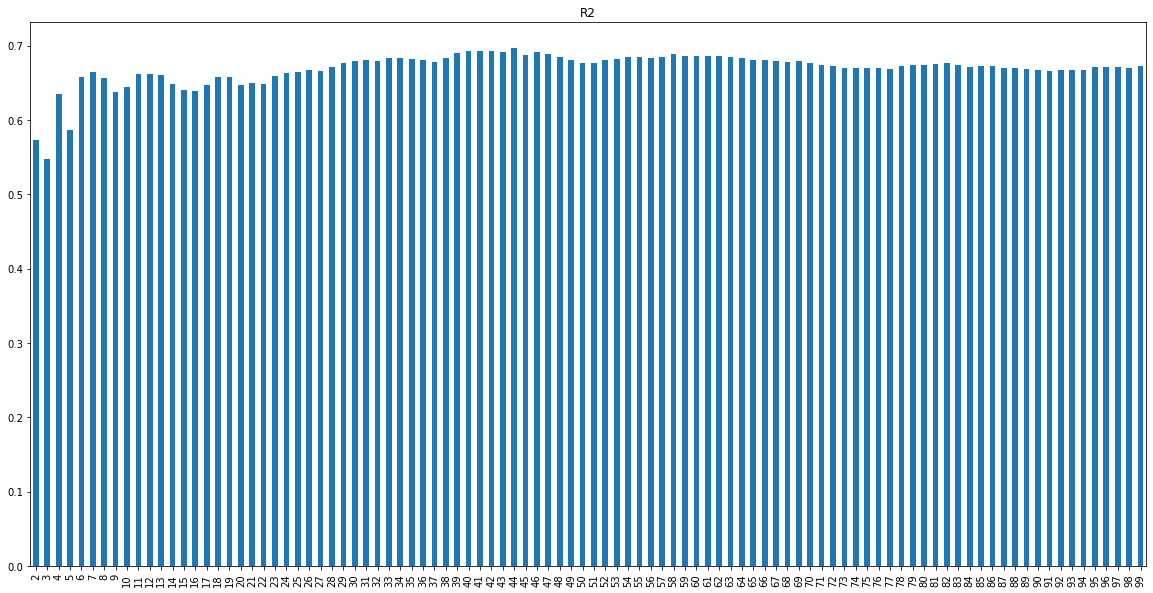

MIN_SAMPLES: 5
max: 0.022177602444017962
min: 0.01695878190095107


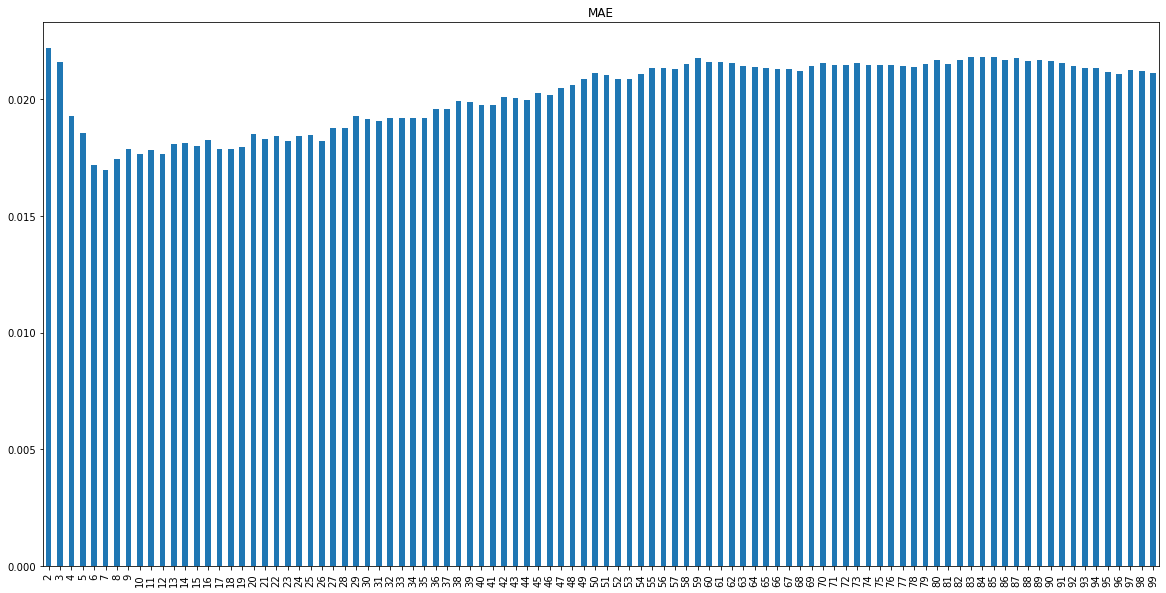

max: 0.2902673933127631
min: 0.19492146797694737


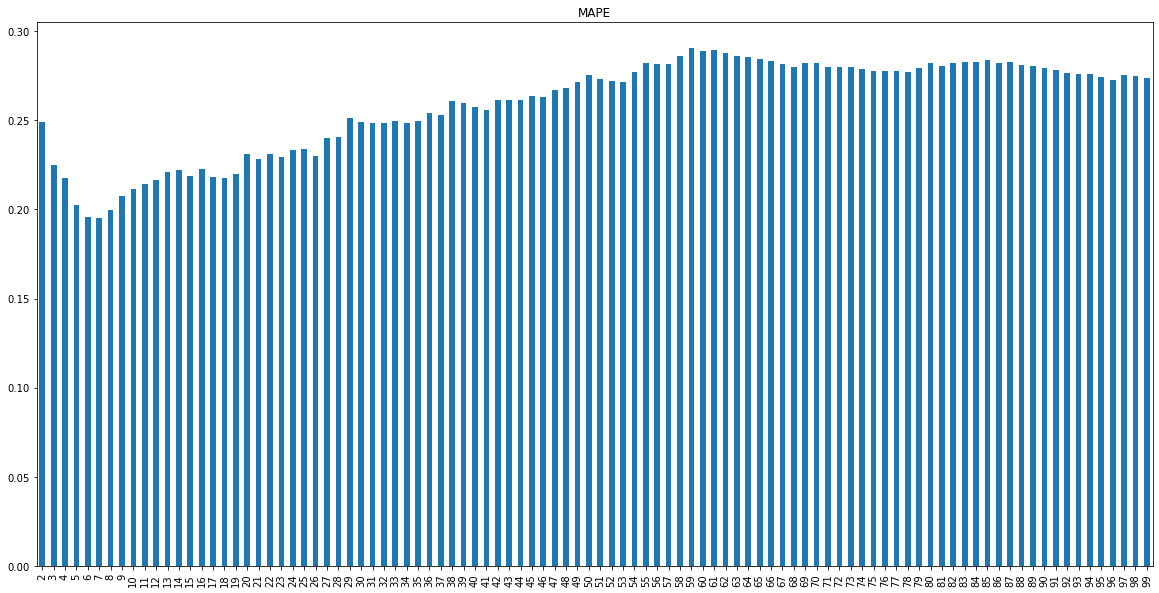

max: 0.030894292197139798
min: 0.02633794438620275


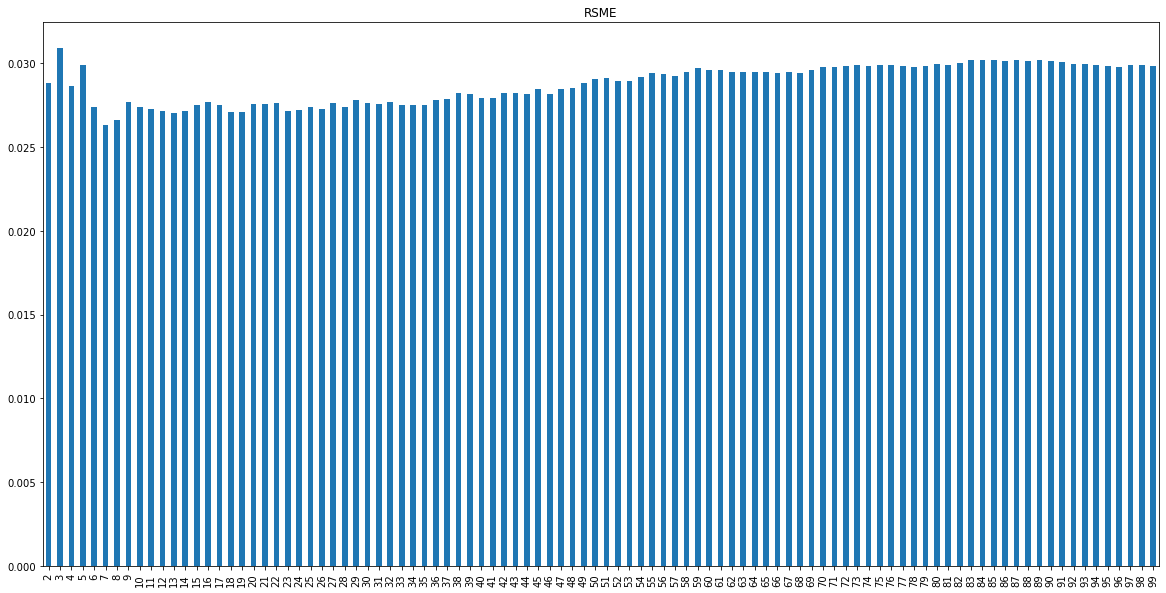

max: 0.6697781852494323
min: 0.5456416573557593


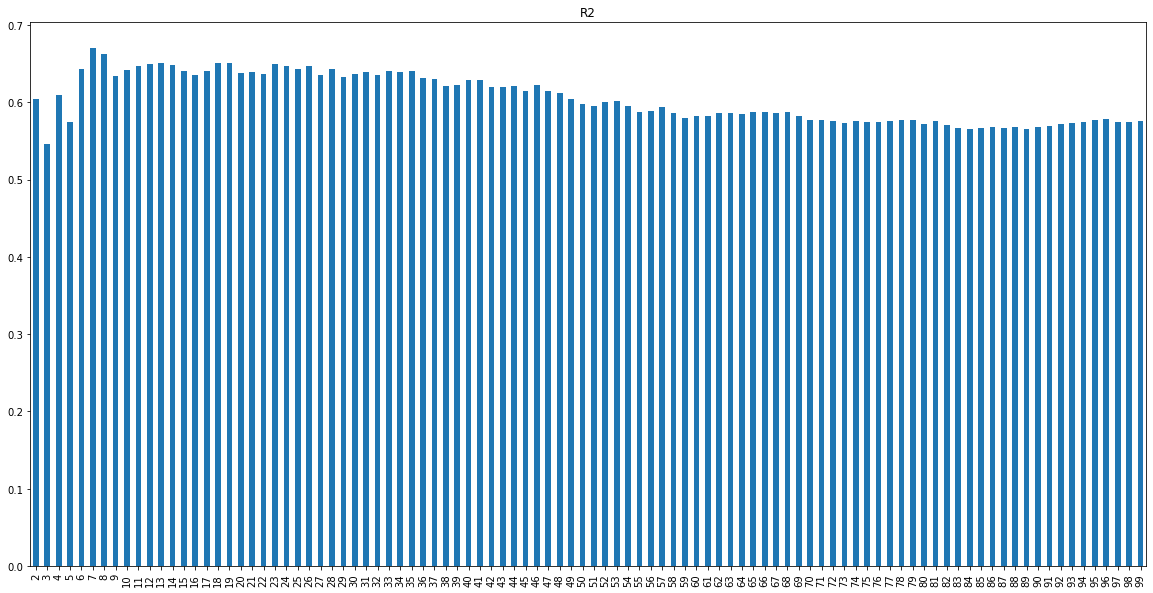

In [6]:
# iterating per number of min_samples and n_estimators
for min_sample in range(1,6):
    print("MIN_SAMPLES:", min_sample)
    score_list=[]
    n_list=[]
    for n in range (2,100):
        lista = training_RandomForestRegressor(X, y_YI, n_estimators=n, min_samples_leaf = min_sample)
        lista = lista[:-2]
        score_list.append(lista)
        n_list.append(n)

    df_scores = pd.DataFrame(data = score_list, index= n_list, columns = ['MAE','MAPE','RSME','R2'])

    for column in df_scores.columns:
        print("max:",df_scores[column].max())
        print("min:",df_scores[column].min())
        df_scores[column].plot(kind='bar', figsize=(20,10));
        plt.title(column)
        plt.show()
    

MAE train set: 0.011635508684348518
MAPE train set:: 0.13932231586357044
RSME train set:: 0.017051103232060254
R2 score train set:: 0.8615965312987932


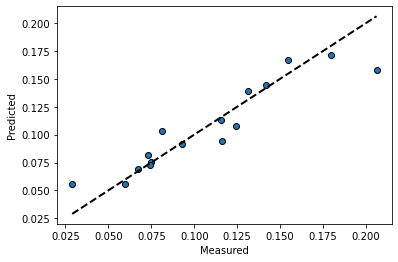

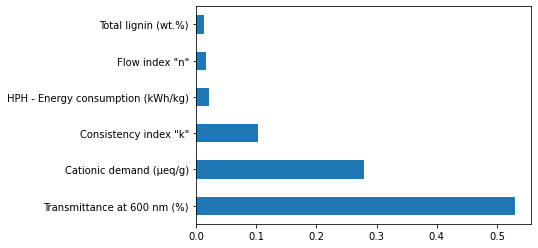

In [35]:
# Looking at the graphs above, we decide that n_estimators = 40 and min_leaf_samples = 2 
# Now, we are going to fit the model with the best hyperparameters chosen. 

best_n1_YI = training_RandomForestRegressor(X, y_YI, print_out = True, n_estimators =40, min_samples_leaf = 2)


In [36]:
best_n1_YI[4]

Cationic demand (µeq/g)              0.278886
Transmittance at 600 nm (%)          0.529883
HPH - Energy consumption (kWh/kg)    0.022111
Consistency index "k"                0.102678
Flow index "n"                       0.016709
Cellulose (wt.%)                     0.007950
Hemicellulose (wt.%)                 0.005615
Total lignin (wt.%)                  0.012912
Extractives (wt.%)                   0.008996
Ashes (wt.%)                         0.011544
CrI (%)                              0.002716
dtype: float64

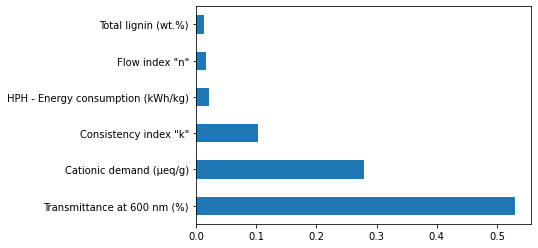

In [37]:
fig = best_n1_YI[4].nlargest(6).plot(kind='barh');
plt.savefig('FI_YIELD.png', dpi=600, bbox_inches = "tight")
plt.show()

In [10]:
model_article = RandomForestRegressor(n_estimators=40, min_samples_leaf=2, random_state = 0)
model_article.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=2, n_estimators=40, random_state=0)

MAE: 0.012372018179188666
MAPE: 0.14530619727148783
RSME: 0.01877950326999658
R2: 0.8321156519216855


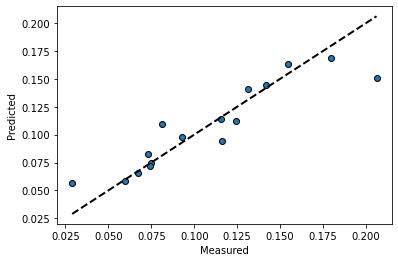

In [13]:
model_article_pred = model_article.predict(X_train)

print ('MAE:', mean_absolute_error(y_train,model_article_pred))
print('MAPE:' , mean_absolute_percentage_error(y_train,model_article_pred))
print('RSME:' , mean_squared_error(y_train,model_article_pred, squared = False))
print('R2:' , r2_score(y_train,model_article_pred))

fig, ax = plt.subplots()
ax.scatter(y_train, model_article_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

MAE: 0.01991751067573133
MAPE: 0.43922320494038647
RSME: 0.02262187724398637
R2: 0.7878317925058916


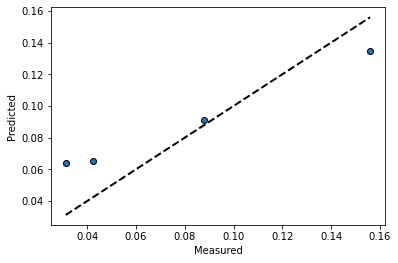

In [14]:
model_article_pred_test = model_article.predict(X_test)

print ('MAE:', mean_absolute_error(y_test,model_article_pred_test))
print('MAPE:' , mean_absolute_percentage_error(y_test,model_article_pred_test))
print('RSME:' , mean_squared_error(y_test,model_article_pred_test, squared = False))
print('R2:' , r2_score(y_test,model_article_pred_test))

fig, ax = plt.subplots()
ax.scatter(y_test,model_article_pred_test, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [11]:
X_train.columns

Index(['Cationic demand (µeq/g)', 'Transmittance at 600 nm (%)',
       'HPH - Energy consumption (kWh/kg)', 'Consistency index "k"',
       'Flow index "n"', 'Cellulose (wt.%)', 'Hemicellulose (wt.%)',
       'Total lignin (wt.%)', 'Extractives (wt.%)', 'Ashes (wt.%)', 'CrI (%)'],
      dtype='object')

In [14]:
# Considering that more important features regard only the ones that have a score >=0.1, we choose
# the following variables: 

X_selected = X_train[['Cationic demand (µeq/g)', 'Transmittance at 600 nm (%)',
       'HPH - Energy consumption (kWh/kg)']].copy()

# Getting consistency index k

X_selected_consistency = X_train[['Cationic demand (µeq/g)', 'Transmittance at 600 nm (%)',
       'HPH - Energy consumption (kWh/kg)', 'Consistency index "k"','Extractives (wt.%)']].copy()

# Getting cellulose

#X_selected_cellulose = X_train[['Cationic demand (µeq/g)', 'Transmittance at 600 nm (%)',
 #      'HPH - Energy consumption (kWh/kg)', 'Consistency index "k"', 'Cellulose (wt.%)']].copy()


In [13]:
model_selection = RandomForestRegressor(n_estimators=40, min_samples_leaf=2, random_state = 0)
model_selection.fit(X_selected, y_train)

RandomForestRegressor(min_samples_leaf=2, n_estimators=40, random_state=0)

MAE: 0.013601318294820218
MAPE: 0.17437259278538642
RSME: 0.017218170374700442
R2: 0.8588710829808472


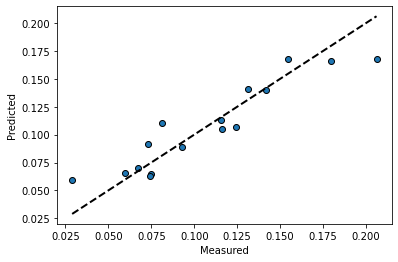

In [14]:
model_selection_pred = model_selection.predict(X_selected)

print ('MAE:', mean_absolute_error(y_train,model_selection_pred))
print('MAPE:' , mean_absolute_percentage_error(y_train,model_selection_pred))
print('RSME:' , mean_squared_error(y_train,model_selection_pred, squared = False))
print('R2:' , r2_score(y_train,model_selection_pred))

fig, ax = plt.subplots()
ax.scatter(y_train, model_selection_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [15]:
model_selection.predict(X_selected)

array([0.11047243, 0.1049235 , 0.16735766, 0.14002596, 0.05904024,
       0.09170357, 0.10638478, 0.16735766, 0.0701828 , 0.1132811 ,
       0.06468386, 0.16593728, 0.14047027, 0.06298763, 0.06546366,
       0.08923841])

MAE: 0.013502855344269623
MAPE: 0.34193578559364507
RSME: 0.01672941365034346
R2: 0.8839662137549292


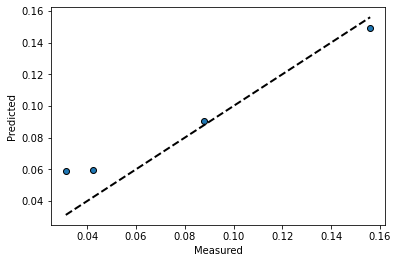

In [16]:
X_test_selected = X_test[['Cationic demand (µeq/g)', 'Transmittance at 600 nm (%)',
       'HPH - Energy consumption (kWh/kg)']].copy()

model_selection_pred_test = model_selection.predict(X_test_selected)

print ('MAE:', mean_absolute_error(y_test,model_selection_pred_test))
print('MAPE:' , mean_absolute_percentage_error(y_test,model_selection_pred_test))
print('RSME:' , mean_squared_error(y_test,model_selection_pred_test, squared = False))
print('R2:' , r2_score(y_test,model_selection_pred_test))

fig, ax = plt.subplots()
ax.scatter(y_test, model_selection_pred_test, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [100]:
#Saving this model for RF for YI

#RF_model_YI = 'RF_model_YI.pkl'
#pickle.dump(model_selection, open(RF_model_YI, 'wb'))

MAE: 0.011977157215197962
MAPE: 0.14439514943565185
RSME: 0.017713522926851615
R2: 0.8506339505090013


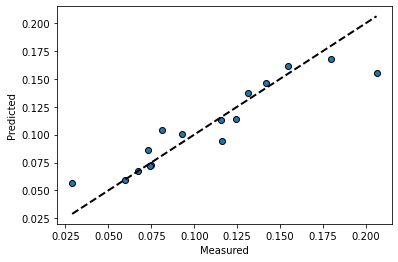

In [18]:
model_selection_con = RandomForestRegressor(n_estimators=40, min_samples_leaf=2, random_state = 0)
model_selection_con.fit(X_selected_consistency, y_train)

model_selection_pred_con = model_selection_con.predict(X_selected_consistency)

print ('MAE:', mean_absolute_error(y_train,model_selection_pred_con))
print('MAPE:' , mean_absolute_percentage_error(y_train,model_selection_pred_con))
print('RSME:' , mean_squared_error(y_train,model_selection_pred_con, squared = False))
print('R2:' , r2_score(y_train,model_selection_pred_con))

fig, ax = plt.subplots()
ax.scatter(y_train, model_selection_pred_con, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [19]:
X_test_con = X_test[['Cationic demand (µeq/g)', 'Transmittance at 600 nm (%)',
       'HPH - Energy consumption (kWh/kg)', 'Consistency index "k"','Extractives (wt.%)']].copy()

In [20]:
model_selection_con.predict(X_test_con)

print ('MAE:', mean_absolute_error(y_test, model_selection_con.predict(X_test_con)))
print('MAPE:' , mean_absolute_percentage_error(y_test, model_selection_con.predict(X_test_con)))
print('RSME:' , mean_squared_error(y_test, model_selection_con.predict(X_test_con), squared = False))
print('R2:' , r2_score(y_test, model_selection_con.predict(X_test_con)))

MAE: 0.01797956839412579
MAPE: 0.38270727875876515
RSME: 0.01977053408683246
R2: 0.8379459729532958


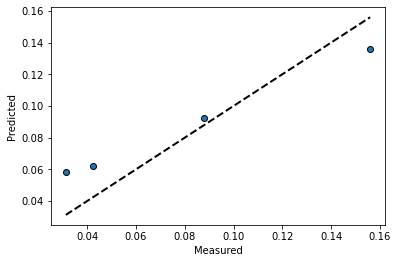

In [21]:
fig, ax = plt.subplots()
ax.scatter(y_test, model_selection_con.predict(X_test_con), edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

MAE: 0.012392577044193245
MAPE: 0.1478666140915595
RSME: 0.01783427707979066
R2: 0.8485905344077891


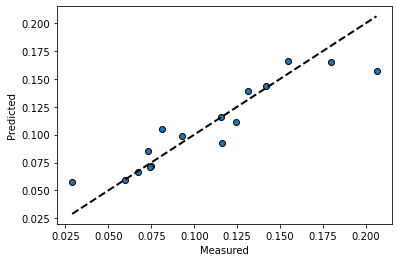

In [149]:
X_alt_article_again = X_train[['Cationic demand (µeq/g)', 'Transmittance at 600 nm (%)',
       'Consistency index "k"']].copy()

model_alt_artcile_again = RandomForestRegressor(n_estimators=40, min_samples_leaf=2, random_state = 0)
model_alt_artcile_again.fit(X_alt_article_again, y_train)

model_alt_artcile_again_pred = model_alt_artcile_again.predict(X_alt_article_again)

print ('MAE:', mean_absolute_error(y_train,model_alt_artcile_again_pred))
print('MAPE:' , mean_absolute_percentage_error(y_train,model_alt_artcile_again_pred))
print('RSME:' , mean_squared_error(y_train,model_alt_artcile_again_pred, squared = False))
print('R2:' , r2_score(y_train,model_alt_artcile_again_pred))

fig, ax = plt.subplots()
ax.scatter(y_train, model_alt_artcile_again_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [147]:
X_test_alt_article = X_test[['Cationic demand (µeq/g)', 'Transmittance at 600 nm (%)',
       'Consistency index "k"']].copy()


In [148]:
model_alt_artcile_again.predict(X_test_alt_article)

print ('MAE:', mean_absolute_error(y_test, model_alt_artcile_again.predict(X_test_alt_article)))
print('MAPE:' , mean_absolute_percentage_error(y_test, model_alt_artcile_again.predict(X_test_alt_article)))
print('RSME:' , mean_squared_error(y_test, model_alt_artcile_again.predict(X_test_alt_article), squared = False))
print('R2:' , r2_score(y_test, model_alt_artcile_again.predict(X_test_alt_article)))

MAE: 0.0165218056232376
MAPE: 0.36816879473017905
RSME: 0.019005060807129867
R2: 0.8502518204695593


MAE: 0.012611546355957811
MAPE: 0.1518010163408543
RSME: 0.01842283653892522
R2: 0.8384321281184028


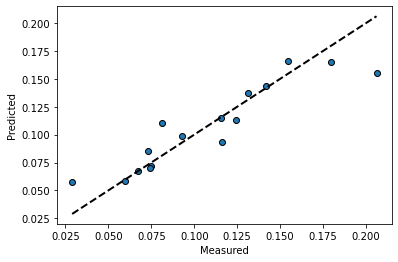

In [39]:
X_alt_article_again = X_train[['Cationic demand (µeq/g)', 'Transmittance at 600 nm (%)',
       'Consistency index "k"','HPH - Energy consumption (kWh/kg)']].copy()

model_alt_artcile_again = RandomForestRegressor(n_estimators=40, min_samples_leaf=2, random_state = 0)
model_alt_artcile_again.fit(X_alt_article_again, y_train)

model_alt_artcile_again_pred = model_alt_artcile_again.predict(X_alt_article_again)

print ('MAE:', mean_absolute_error(y_train,model_alt_artcile_again_pred))
print('MAPE:' , mean_absolute_percentage_error(y_train,model_alt_artcile_again_pred))
print('RSME:' , mean_squared_error(y_train,model_alt_artcile_again_pred, squared = False))
print('R2:' , r2_score(y_train,model_alt_artcile_again_pred))

fig, ax = plt.subplots()
ax.scatter(y_train, model_alt_artcile_again_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [40]:
X_test_alt_article = X_test[['Cationic demand (µeq/g)', 'Transmittance at 600 nm (%)',
       'Consistency index "k"','HPH - Energy consumption (kWh/kg)']].copy()


In [41]:
model_alt_artcile_again.predict(X_test_alt_article)

print ('MAE:', mean_absolute_error(y_test, model_alt_artcile_again.predict(X_test_alt_article)))
print('MAPE:' , mean_absolute_percentage_error(y_test, model_alt_artcile_again.predict(X_test_alt_article)))
print('RSME:' , mean_squared_error(y_test, model_alt_artcile_again.predict(X_test_alt_article), squared = False))
print('R2:' , r2_score(y_test, model_alt_artcile_again.predict(X_test_alt_article)))

MAE: 0.018135609742711504
MAPE: 0.3770436924873885
RSME: 0.02024403395260947
R2: 0.8300907047513724


## Linear Regression

In [11]:
from sklearn import preprocessing
from pickle import load

#scaler_YI = preprocessing.MinMaxScaler()
names = X.columns

d = scaler_YI.fit_transform(X_train)
e = scaler_YI.transform(X_test)
f = scaler.fit_transform(X)

pickle.dump(scaler_YI, open('final_scaler_YI.pkl', 'wb'))
scaled_X_train = pd.DataFrame(d, columns = names)
scaled_X_test = pd.DataFrame(e, columns = names)
scaled_X = pd.DataFrame(f, columns = names)

In [12]:
LR_model = LinearRegression()

LR_model.fit(scaled_X_train, y_train)

LinearRegression()

In [13]:
LR_model_pred = LR_model.predict(scaled_X_train)

MAE: 0.009734945925825356
MAPE: 0.11131382224307108
RSME: 0.010993290276467203
R2: 0.9424695993683541


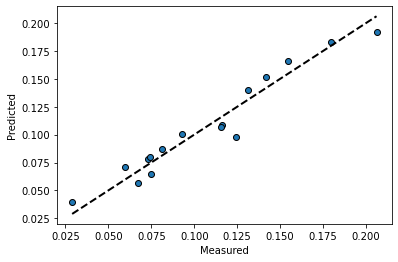

In [14]:
print ('MAE:', mean_absolute_error(y_train,LR_model_pred))
print('MAPE:' , mean_absolute_percentage_error(y_train,LR_model_pred))
print('RSME:' , mean_squared_error(y_train,LR_model_pred, squared = False))
print('R2:' , r2_score(y_train,LR_model_pred))

fig, ax = plt.subplots()
ax.scatter(y_train, LR_model_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [15]:
def metrics_and_plot(prediction, ytest):
    """This function is for computing MAE, MAPE, RSME and R² for regression models
    and also plot the graph predicted VS actual measure"""
    
    print ('MAE:', mean_absolute_error(ytest,prediction))
    print('MAPE:' , mean_absolute_percentage_error(ytest,prediction))
    print('RSME:' , mean_squared_error(ytest,prediction, squared = False))
    print('R2:' , r2_score(ytest,prediction))

    fig, ax = plt.subplots()
    ax.scatter(ytest, prediction, edgecolors=(0, 0, 0))
    ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], "k--", lw=2)
    ax.set_xlabel("Measured")
    ax.set_ylabel("Predicted")
    plt.show()

MAE: 0.015933345767276605
MAPE: 0.4254599602029835
RSME: 0.021135319670098497
R2: 0.814800134795976


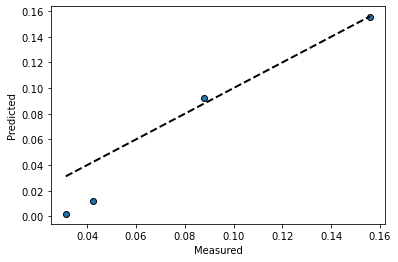

In [16]:
LR_model_pred_test = LR_model.predict(scaled_X_test)

metrics_and_plot(LR_model_pred_test, y_test)



In [29]:
y_test

array([0.156     , 0.0312    , 0.08796542, 0.0422    ])

In [30]:
LR_model_pred_df = pd.Series(LR_model_pred, index = X_train.index)

y_train_df = pd.Series(y_train, index = X_train.index)

new_df = pd.concat([LR_model_pred_df,y_train_df], axis = 1)
new_df.columns = ['Prediction', 'Target']
new_df

,Prediction,Target
8,0.086743,0.081100
5,0.108875,0.116000
11,0.165661,0.154794
3,0.151719,0.142000
18,0.039419,0.029000
16,0.077984,0.073100
13,0.097685,0.124100
2,0.191446,0.206000
9,0.056873,0.067400
19,0.106714,0.115685


In [31]:
LR_model_testpred_df = pd.Series(LR_model_pred_test, index = X_test.index)

y_test_df = pd.Series(y_test, index = X_test.index)

new_df_test = pd.concat([LR_model_testpred_df,y_test_df], axis = 1)
new_df_test.columns = ['Prediction', 'Target']
new_df_test

,Prediction,Target
0,0.155738,0.156000
17,0.001881,0.031200
15,0.091927,0.087965
1,0.012010,0.042200


In [32]:
coef = LR_model.coef_

In [33]:
coef = abs(coef)

In [34]:
coef_df = pd.DataFrame(data = coef)
coef_df['Feature'] = (['Cationic demand (µeq/g)', 'Transmittance at 600 nm (%)',
       'HPH - Energy consumption (kWh/kg)', 'Consistency index "k"',
       'Flow index "n"', 'Cellulose (wt.%)', 'Hemicellulose (wt.%)',
       'Total lignin (wt.%)', 'Extractives (wt.%)', 'Ashes (wt.%)', 'CrI (%)'])

coef_df.columns = ['LR Weights', 'Feature']

coef_df.sort_values(by = ['LR Weights'], ascending = False)

,LR Weights,Feature
1,0.103190,Transmittance at 600 nm (%)
0,0.102690,Cationic demand (µeq/g)
3,0.082153,"Consistency index ""k"""
8,0.053296,Extractives (wt.%)
2,0.046646,HPH - Energy consumption (kWh/kg)
4,0.043280,"Flow index ""n"""
9,0.030721,Ashes (wt.%)
7,0.020620,Total lignin (wt.%)
5,0.014670,Cellulose (wt.%)
10,0.006915,CrI (%)


In [21]:
def training_LinearRegression(scaled_X, y, print_out = False):
    
    """
    This function will train and output results for the model
    
    Data should be already splitted into train and test subsets. Also X should already be scaled
    
    X -> DataFrame of the features, already scaled and already set to train subset
    y -> DataFrame of the targets
    """
    # instanciating the model
    LR_model = LinearRegression()

    # training the model
    LR_model.fit(scaled_X, y)
    
    # predicting the model with train set
    LRprediction_train = LR_model.predict(scaled_X)
    
    # output the results from train set
    MAE_LR = mean_absolute_error(y,LRprediction_train)
    MAPE_LR = mean_absolute_percentage_error(y,LRprediction_train)
    RSME_LR = mean_squared_error(y,LRprediction_train, squared = False)
    R2_LR = r2_score(y,LRprediction_train)
    
    if print_out == True:
        print("MAE train set:", MAE_LR)
        print("MAPE train set::", MAPE_LR)
        print("RSME train set::", RSME_LR)
        print("R2 score train set::", R2_LR)

        fig, ax = plt.subplots()
        ax.scatter(y, LRprediction_train, edgecolors=(0, 0, 0))
        ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=2)
        ax.set_xlabel("Measured")
        ax.set_ylabel("Predicted")
        plt.show()
    
    return [MAE_LR,MAPE_LR,RSME_LR,R2_LR,LR_model]
    

In [53]:
# Taking away Hemicellulose

scaled_X_train_v2 = scaled_X_train[['Cationic demand (µeq/g)', 'Transmittance at 600 nm (%)',
       'HPH - Energy consumption (kWh/kg)', 'Consistency index "k"', 'Extractives (wt.%)']]

MAE train set: 0.011149615616963458
MAPE train set:: 0.1401440792833426
RSME train set:: 0.012897085346074514
R2 score train set:: 0.920818239274408


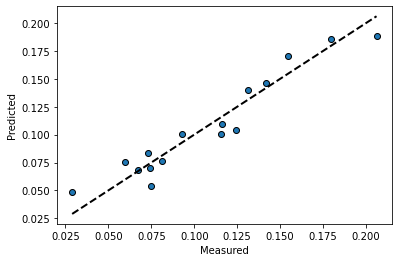

In [54]:
v2 = training_LinearRegression(scaled_X_train_v2, y_train, print_out = True)

In [55]:
v2_model = v2[4]

scaled_X_test_v2 = scaled_X_test[['Cationic demand (µeq/g)', 'Transmittance at 600 nm (%)',
       'HPH - Energy consumption (kWh/kg)', 'Consistency index "k"', 'Extractives (wt.%)']].copy()

v2_model.predict(scaled_X_test_v2)

print("MAE test set:", mean_absolute_error(y_test,v2_model.predict(scaled_X_test_v2)) )
print("MAPE test set::", mean_absolute_percentage_error(y_test,v2_model.predict(scaled_X_test_v2)))
print("RSME test set::", mean_squared_error(y_test,v2_model.predict(scaled_X_test_v2), squared = False))
print("R2 score test set::", r2_score(y_test,v2_model.predict(scaled_X_test_v2)) )

MAE test set: 0.010464086514615886
MAPE test set:: 0.270025190269626
RSME test set:: 0.01370708026224526
R2 score test set:: 0.9221043983452564


MAE: 0.010464086514615886
MAPE: 0.270025190269626
RSME: 0.01370708026224526
R2: 0.9221043983452564


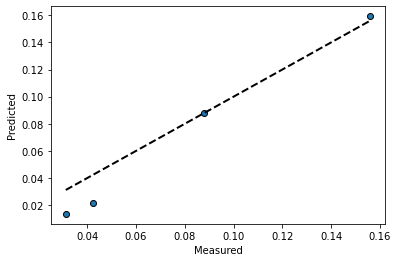

In [56]:
metrics_and_plot(v2_model.predict(scaled_X_test_v2), y_test)

In [64]:
coef_v2 = v2_model.coef_
intercept_v2 = v2_model.intercept_
intercept_v2

0.06705069359816435

In [65]:
#coef_v2 = abs(coef_v2)

In [66]:
coef_df2 = pd.DataFrame(data = coef_v2)
coef_df2['Feature'] = (['Cationic demand (µeq/g)', 'Transmittance at 600 nm (%)',
       'HPH - Energy consumption (kWh/kg)', 'Consistency index "k"', 'Extractives (wt.%)'])

coef_df2.columns = ['LR Weights', 'Feature']

coef_df2.sort_values(by = ['LR Weights'], ascending = False)

,LR Weights,Feature
1,0.141083,Transmittance at 600 nm (%)
0,0.107043,Cationic demand (µeq/g)
3,-0.022983,"Consistency index ""k"""
4,-0.029081,Extractives (wt.%)
2,-0.089373,HPH - Energy consumption (kWh/kg)


In [93]:
#Saving this last model

#final_model_YI_LR = 'final_model_YI_LR.pkl'
#pickle.dump(v2_model, open(final_model_YI_LR, 'wb'))

In [95]:
y_YI

,Yield of nanofibrillation (%)
0,0.156000
1,0.042200
2,0.206000
3,0.142000
4,0.074598
5,0.116000
6,0.092600
7,0.131238
8,0.081100
9,0.067400


In [25]:
scaled_X_train_v3 = scaled_X_train[['Cationic demand (µeq/g)', 'Transmittance at 600 nm (%)',
       'HPH - Energy consumption (kWh/kg)','Consistency index "k"']]

MAE train set: 0.01222116115044532
MAPE train set:: 0.14939322507344377
RSME train set:: 0.015682346414670187
R2 score train set:: 0.882925019779692


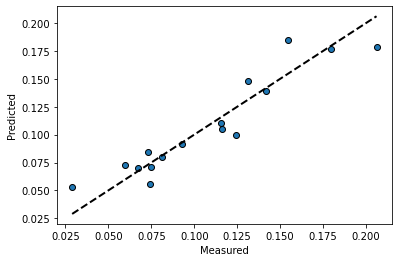

In [29]:
v3 = training_LinearRegression(scaled_X_train_v3, y_train, print_out = True)

In [30]:
v3_model = v3[4]

scaled_X_test_v3 = scaled_X_test[['Cationic demand (µeq/g)', 'Transmittance at 600 nm (%)',
       'HPH - Energy consumption (kWh/kg)','Consistency index "k"']].copy()

v3_model.predict(scaled_X_test_v3)

print("MAE test set:", mean_absolute_error(y_test,v3_model.predict(scaled_X_test_v3)) )
print("MAPE test set::", mean_absolute_percentage_error(y_test,v3_model.predict(scaled_X_test_v3)))
print("RSME test set::", mean_squared_error(y_test,v3_model.predict(scaled_X_test_v3), squared = False))
print("R2 score test set::", r2_score(y_test,v3_model.predict(scaled_X_test_v3)) )

MAE test set: 0.011675492324867927
MAPE test set:: 0.2375367062419041
RSME test set:: 0.012195676296836926
R2 score test set:: 0.9383355586027696


MAE: 0.011675492324867927
MAPE: 0.2375367062419041
RSME: 0.012195676296836926
R2: 0.9383355586027696


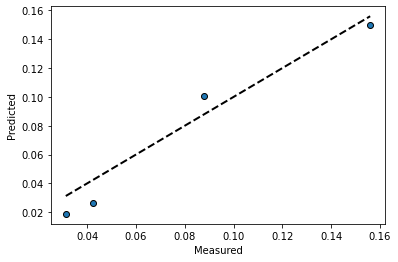

In [31]:
metrics_and_plot(v3_model.predict(scaled_X_test_v3), y_test)

In [32]:
#Saving this last model too

#simpler_final_model_YI_LR = 'simpler_final_model_YI_LR.pkl'
#pickle.dump(v3_model, open(simpler_final_model_YI_LR, 'wb'))

## Neural Networks

In [16]:
# importing relevant libraries for NN

import tensorflow as tf
tf.random.set_seed(42) 

In [18]:
def neural_networks_model_SIMPLE (scaledX, ytrain,inputsize = 11, hiddenlayer_size = 50, batch_size = 4, max_epochs = 100, initial_learning_rate = 0.01):
    
    global initial_history
    # We already have a train and test sets, already scaled. Therefore, let's create the model

    # Defining the input, output and hidden layer sizes:

    input_size = inputsize #Correspond to the number of features in scaled_X_train
    output_size = 1 #We only have one output (Aspect Ratio)
    hidden_layer_size = hiddenlayer_size #50 is used as an initial value , since we don't know yet the optimal size of the hidden layers.

    # Last layer is linear since we are working with a classification problem. 
    nn_model = tf.keras.Sequential([
                            tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                            tf.keras.layers.Dense(output_size, activation = 'linear')
                            ])

    opt = tf.keras.optimizers.Adam(learning_rate= initial_learning_rate) #learning_rate= initial_learning_rate, beta_1 = 0.9

    # 
    nn_model.compile(optimizer = opt, 
                     loss = [tf.keras.losses.MeanAbsoluteError(name='mean_absolute_error')], 
                     metrics=[tf.keras.metrics.MeanAbsolutePercentageError(name='mean_absolute_percentage_error')])



    initial_history  = nn_model.fit(scaledX,
             ytrain,
             batch_size = batch_size,
             epochs = max_epochs,
             #callbacks=[
                 #tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 * (epoch/30))],
             verbose=0)
    return [nn_model]

In [126]:
v_allfeat = neural_networks_model_SIMPLE(scaled_X_train, 
                                 y_train,
                                 inputsize = 11, 
                                 hiddenlayer_size = 11, 
                                 batch_size = 16, 
                                 max_epochs = 400, 
                                 )
    
nn_simple_model_v_allfeat = v_allfeat[0]
nn_simple_model_predalt= nn_simple_model_v_allfeat.predict(scaled_X_train)
nn_simple_model_testalt = nn_simple_model_v_allfeat.predict(scaled_X_test)
   
MAE_train = mean_absolute_error(y_train,nn_simple_model_predalt)
MAPE_train = mean_absolute_percentage_error(y_train,nn_simple_model_predalt)
RSME_train = mean_squared_error(y_train,nn_simple_model_predalt,squared = False)
R2_train = r2_score(y_train,nn_simple_model_predalt)
   
MAE_test = mean_absolute_error(y_test,nn_simple_model_testalt)
MAPE_test = mean_absolute_percentage_error(y_test,nn_simple_model_testalt)
RSME_test =  mean_squared_error(y_test,nn_simple_model_testalt, squared = False)
R2_test = r2_score(y_test,nn_simple_model_testalt)
    


print("MAE train set:", MAE_train)
print("MAPE train set::", MAPE_train)
print("RSME train set::", RSME_train)
print("R2 score train set::", R2_train)   
print("MAE test set:", MAE_test)
print("MAPE test set::", MAPE_test)
print("RSME test set::", RSME_test)
print("R2 score test set::", R2_test)  

MAE train set: 0.005629771423231707
MAPE train set:: 0.06939242843176222
RSME train set:: 0.006771183027899537
R2 score train set:: 0.9781741526513371
MAE test set: 0.009521680112147808
MAPE test set:: 0.1648142808873518
RSME test set:: 0.009770752843673363
R2 score test set:: 0.9604197001567326


In [127]:
#nn_simple_model_v_allfeat.save(r'C:\Users\Solange Iamin\Modelos mestrado\Props nanocel LEPAMAP\nn_allfeat_article_yield')

INFO:tensorflow:Assets written to: C:\Users\Solange Iamin\Modelos mestrado\Props nanocel LEPAMAP\nn_allfeat_article_yield\assets


In [47]:
# I'll try to use the feature previously chosen for the other models, and see if it is adequate

scaled_X_train_sel = scaled_X_train[['Cationic demand (µeq/g)', 'Transmittance at 600 nm (%)',
       'HPH - Energy consumption (kWh/kg)','Consistency index "k"', 'Extractives (wt.%)']].copy()
scaled_X_test_sel = scaled_X_test[['Cationic demand (µeq/g)', 'Transmittance at 600 nm (%)',
       'HPH - Energy consumption (kWh/kg)','Consistency index "k"', 'Extractives (wt.%)']].copy()

scaled_X_train_alt_2 = scaled_X_train[['Cationic demand (µeq/g)', 'Transmittance at 600 nm (%)',
       'HPH - Energy consumption (kWh/kg)','Consistency index "k"']].copy()
scaled_X_test_alt_2 = scaled_X_test[['Cationic demand (µeq/g)', 'Transmittance at 600 nm (%)',
       'HPH - Energy consumption (kWh/kg)','Consistency index "k"']].copy()

In [128]:
pip install h5py

Note: you may need to restart the kernel to use updated packages.


In [120]:
v_sel_3 = neural_networks_model_SIMPLE(scaled_X_train_sel, 
                                 y_train,
                                 inputsize = 5, 
                                 hiddenlayer_size = 5, 
                                 batch_size = 16, 
                                 max_epochs = 400, 
                                 )

nn_simple_model_v_sel_3 = v_sel_3[0]
nn_simple_model_predalt= nn_simple_model_v_sel_3.predict(scaled_X_train_sel)
nn_simple_model_testalt = nn_simple_model_v_sel_3.predict(scaled_X_test_sel)
    
MAE_train = mean_absolute_error(y_train,nn_simple_model_predalt)
MAPE_train = mean_absolute_percentage_error(y_train,nn_simple_model_predalt)
RSME_train = mean_squared_error(y_train,nn_simple_model_predalt,squared = False)
R2_train = r2_score(y_train,nn_simple_model_predalt)
    
MAE_test = mean_absolute_error(y_test,nn_simple_model_testalt)
MAPE_test = mean_absolute_percentage_error(y_test,nn_simple_model_testalt)
RSME_test =  mean_squared_error(y_test,nn_simple_model_testalt, squared = False)
R2_test = r2_score(y_test,nn_simple_model_testalt)

print("MAE train set:", MAE_train)
print("MAPE train set::", MAPE_train)
print("RSME train set::", RSME_train)
print("R2 score train set::", R2_train)   
print("MAE test set:", MAE_test)
print("MAPE test set::", MAPE_test)
print("RSME test set::", RSME_test)
print("R2 score test set::", R2_test)

MAE train set: 0.0040518806865160375
MAPE train set:: 0.05417098030229771
RSME train set:: 0.006251598976480993
R2 score train set:: 0.9813952332343037
MAE test set: 0.004647870030963898
MAPE test set:: 0.09190016066532009
RSME test set:: 0.004831125676627919
R2 score test set:: 0.9903234689354147


In [128]:
#nn_simple_model_v_sel_3.save(r'C:\Users\Solange Iamin\Modelos mestrado\Props nanocel LEPAMAP\nn_sel_article_yield')

INFO:tensorflow:Assets written to: C:\Users\Solange Iamin\Modelos mestrado\Props nanocel LEPAMAP\nn_sel_article_yield\assets


In [125]:
v_alt_2 = neural_networks_model_SIMPLE(scaled_X_train_alt_2, 
                                 y_train,
                                 inputsize = 4, 
                                 hiddenlayer_size = 4, 
                                 batch_size = 16, 
                                 max_epochs = 400, 
                                 )
    
nn_simple_model_v_alt_2 = v_alt_2[0]
nn_simple_model_predalt_2= nn_simple_model_v_alt_2.predict(scaled_X_train_alt_2)
nn_simple_model_testalt_2 = nn_simple_model_v_alt_2.predict(scaled_X_test_alt_2)
    
MAE_train = mean_absolute_error(y_train,nn_simple_model_predalt_2)
MAPE_train = mean_absolute_percentage_error(y_train,nn_simple_model_predalt_2)
RSME_train = mean_squared_error(y_train,nn_simple_model_predalt_2,squared = False)
R2_train = r2_score(y_train,nn_simple_model_predalt_2)
   
MAE_test = mean_absolute_error(y_test,nn_simple_model_testalt_2)
MAPE_test = mean_absolute_percentage_error(y_test,nn_simple_model_testalt_2)
RSME_test =  mean_squared_error(y_test,nn_simple_model_testalt_2, squared = False)
R2_test = r2_score(y_test,nn_simple_model_testalt_2)
    

print("MAE train set:", MAE_train)
print("MAPE train set::", MAPE_train)
print("RSME train set::", RSME_train)
print("R2 score train set::", R2_train)   
print("MAE test set:", MAE_test)
print("MAPE test set::", MAPE_test)
print("RSME test set::", RSME_test)
print("R2 score test set::", R2_test)
        

MAE train set: 0.005736452215056764
MAPE train set:: 0.060352710156089596
RSME train set:: 0.007648300375052076
R2 score train set:: 0.972153419084287
MAE test set: 0.005907429222797871
MAPE test set:: 0.09543870687153451
RSME test set:: 0.007306747974735988
R2 score test set:: 0.9778654202814038


In [127]:
#nn_simple_model_v_alt_2.save(r'C:\Users\Solange Iamin\Modelos mestrado\Props nanocel LEPAMAP\NN yield alt 2')

INFO:tensorflow:Assets written to: C:\Users\Solange Iamin\Modelos mestrado\Props nanocel LEPAMAP\NN yield alt 2\assets
